In [1]:
# SOLVING CAKE COMPETITION PROBLEM

<div>
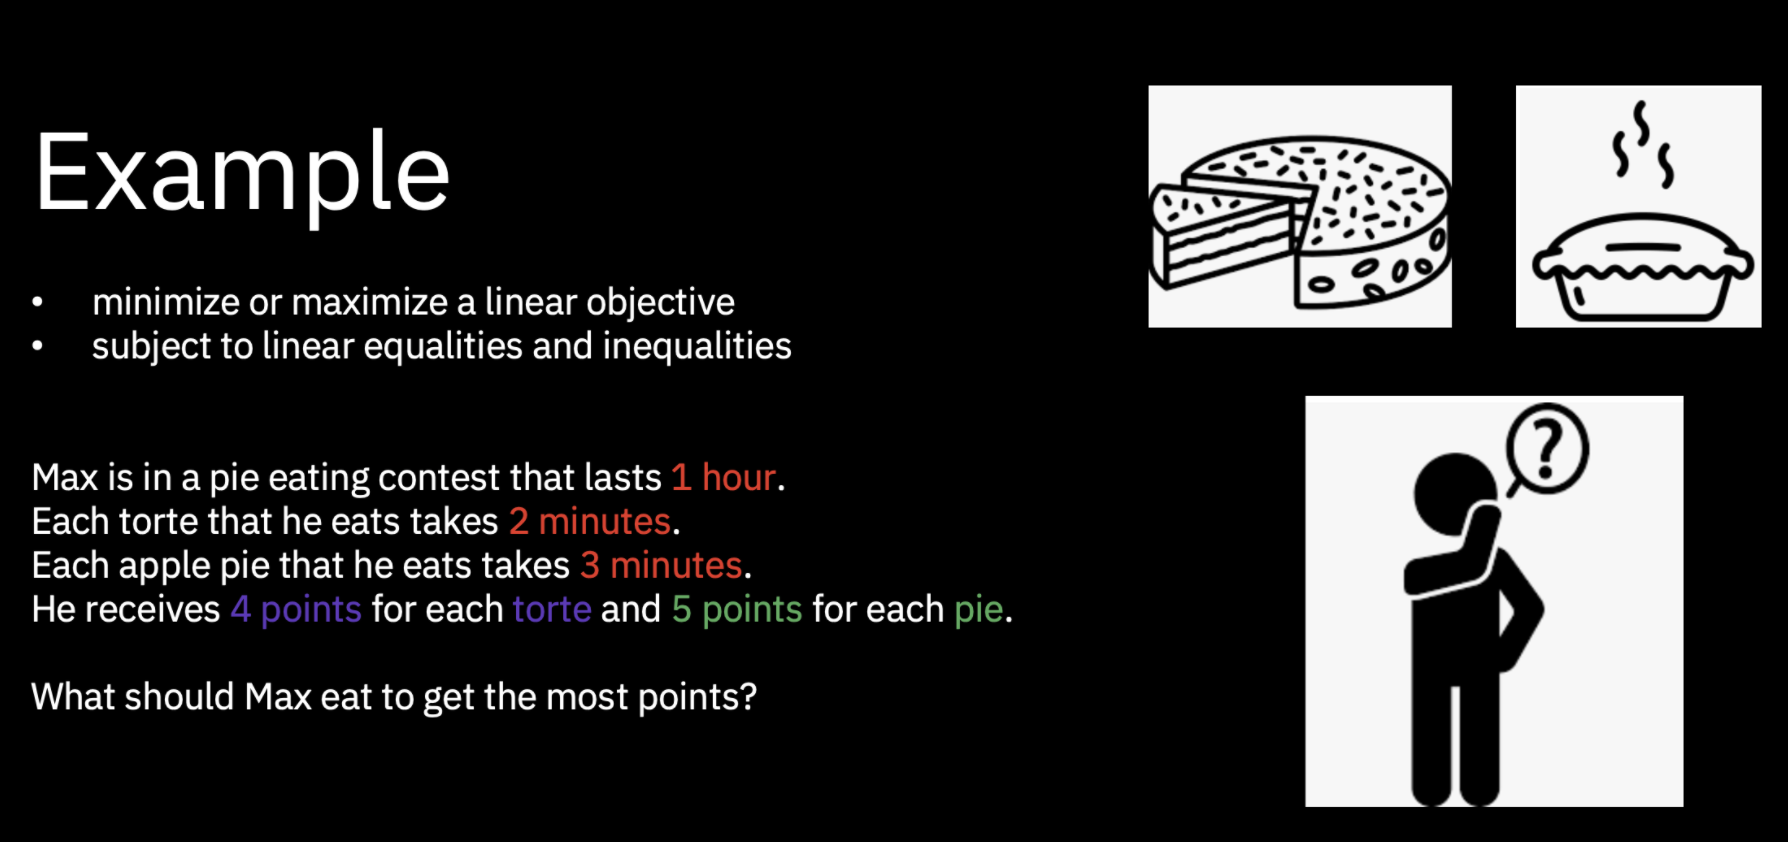
</div>

In [2]:
import cplex 

# create an instance of a linear problem to solve
problem = cplex.Cplex()


# set maximum in objective function
problem.objective.set_sense(problem.objective.sense.maximize)

# set decision variables
names = ["x", "y"]

# set coefficients of the objective function.
# note that we are casting to floats.
objective = [4.0, 5.0]

In [2]:
# lower bounds.
# all zeroes is the default.
lower_bounds = [0.0, 0.0]

# upper bounds. 
# cplex.infinity, or 1e+20 is the default.
upper_bounds = [100, 100]

problem.variables.add(obj = objective,
                      lb = lower_bounds,
                      ub = upper_bounds,
                      names = names)

range(0, 2)

In [3]:
# Constraints

# Constraints are entered in two parts, as a left hand part and a right hand
# part. Most times, these will be represented as matrices in your problem. In
# our case, we have "2x + 3y <= 60" :

# [  2   3 ]   [ x ] ≤ [ 60 ]
#              [ y ]


# First, we name the constraints
constraint_names = ["c1"]

# The actual constraints are now added. Each constraint is actually a list
# consisting of two objects, each of which are themselves lists. The first list
# represents each of the variables in the constraint, and the second list is the
# coefficient of the respective variable. Data is entered in this way as the
# constraints matrix is often sparse.

# The first (and only) constraint and its left side of equation: "2x + 3y"
first_constraint = [["x", "y"], [2.0, 3.0]]

constraints = [ first_constraint ]

# Right side of equation:
rhs = [60.0]

# The sign for the contraint equation:
# ≤ is less then:    "L"
# ≥ is greater then: "G"
# = is equal to:     "E"
constraint_senses = [ "L" ]

# Note that we can actually set senses as a string. That is, we could also use
#     constraint_senses = "LL"
# to pass in our constraints

# And add the constraints
problem.linear_constraints.add(lin_expr = constraints,
                               senses = constraint_senses,
                               rhs = rhs,
                               names = constraint_names)

range(0, 1)

In [4]:
# Solve the problem
problem.solve()

# And print the solutions
print(problem.solution.get_values())

# number of tortes and/or pies to eat  
cakes = []
cakes = problem.solution.get_values()
max_points = problem.solution.get_objective_value()
print('* * *')
print()
print("MAX SHOULD EAT " + \
    str(cakes[0]) + " TORTES " + \
    str(cakes[1]) + " PIES TO GET MAXIMUM OF " + \
    str(max_points) + " POINTS.")
print()
print('* * *')

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)
[30.0, 0.0]
* * *

MAX SHOULD EAT 30.0 TORTES 0.0 PIES TO GET MAXIMUM OF 120.0 POINTS.

* * *
